In [1]:
#Articles used as references:
#https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

In [243]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

In [306]:
raw_data = pd.read_csv('sample2.csv') # Raw data scraped from 'DSN-Now-Eyes-Webscrape' repository python script

In [245]:
raw_data.shape

(249959, 36)

In [246]:
raw_data.head(1) 

,_text,azimuthAngle,created,downSignal,elevationAngle,friendlyName,isArray,isDDOR,isMSPA,name_x,...,power_y,signalType_y,signalTypeDebug_y,spacecraft_y,spacecraftId_y,downlegRange,id,name_y,rtlt,uplegRange
0,STA,180.0,2019-01-13T23:40:09.011Z,"[{'signalType': 'none', 'signalTypeDebug': 'ID...",88.5,Goldstone,False,False,False,DSS14,...,0.000013,none,OFF 0,STA,234.0,2.225289e+08,234.0,STA,1484.459294,2.224996e+08


In [311]:
raw_data.columns # due to data frame merges, some of the features must be renamed;
#relabel up '_x' and '_y' to downsignal and upsignal.

Index(['_text', 'azimuthAngle', 'created', 'downSignal', 'elevationAngle',
       'friendlyName', 'isArray', 'isDDOR', 'isMSPA', 'name_x', 'station',
       'target', 'timeUTC', 'timeZoneOffset', 'upSignal', 'updated',
       'windSpeed', 'dataRate_x', 'frequency_x', 'power_x', 'signalType_x',
       'signalTypeDebug_x', 'spacecraft_x', 'spacecraftId_x', 'dataRate_y',
       'frequency_y', 'power_y', 'signalType_y', 'signalTypeDebug_y',
       'spacecraft_y', 'spacecraftId_y', 'downlegRange', 'id', 'name_y',
       'rtlt', 'uplegRange'],
      dtype='object')

In [249]:
# Renaming column extensions (from webscrape) that have "_x" to "downsignal", and "_y" to "upsignal".

data_new_names = raw_data.rename(columns={"name_x":"DSS","friendlyName":"location","dataRate_x": "dataRate_downsignal", 
    "frequency_x": "frequency_downsignal", "power_x":"power_downsignal","signalType_x":"signalType_downsignal",
    "signalTypeDebug_x":"signalTypeDebug_downsignal", "spacecraft_x":"spacecraft_downsignal",
    "spacecraftId_x":"spacecraftId_downsignal", "dataRate_y":"dataRate_upsignal", "frequency_y":"frequency_upsignal", 
    "power_y":"power_upsignal","signalType_y":"signalType_upsignal","signalTypeDebug_y":"signalTypeDebug_upsignal",
    "spacecraft_y":"spacecraft_upsignal","spacecraftId_y":"spacecraftId_upsignal",  "name_y":"name_upsignal"})

In [250]:
data_new_names.columns

Index(['_text', 'azimuthAngle', 'created', 'downSignal', 'elevationAngle',
       'location', 'isArray', 'isDDOR', 'isMSPA', 'DSS', 'station', 'target',
       'timeUTC', 'timeZoneOffset', 'upSignal', 'updated', 'windSpeed',
       'dataRate_downsignal', 'frequency_downsignal', 'power_downsignal',
       'signalType_downsignal', 'signalTypeDebug_downsignal',
       'spacecraft_downsignal', 'spacecraftId_downsignal', 'dataRate_upsignal',
       'frequency_upsignal', 'power_upsignal', 'signalType_upsignal',
       'signalTypeDebug_upsignal', 'spacecraft_upsignal',
       'spacecraftId_upsignal', 'downlegRange', 'id', 'name_upsignal', 'rtlt',
       'uplegRange'],
      dtype='object')

In [251]:
df = data_new_names[['timeUTC','DSS', 'location','created','timeZoneOffset','azimuthAngle','elevationAngle', 'isArray', 
           'isDDOR', 'isMSPA', 'windSpeed', 'dataRate_downsignal', 'frequency_downsignal','power_downsignal',
           'signalType_downsignal', 'spacecraft_downsignal', 'spacecraftId_downsignal', 
          'dataRate_upsignal', 'frequency_upsignal','power_upsignal', 'signalType_upsignal','spacecraft_upsignal', 'spacecraftId_upsignal',
           'downlegRange', 'id','name_upsignal', 'rtlt', 'uplegRange','signalTypeDebug_downsignal', 'signalTypeDebug_upsignal']]

In [310]:
df.dtypes

timeUTC                         int64
DSS                            object
location                       object
created                        object
timeZoneOffset                  int64
azimuthAngle                  float64
elevationAngle                float64
isArray                          bool
isDDOR                           bool
isMSPA                           bool
windSpeed                     float64
dataRate_downsignal           float64
frequency_downsignal          float64
power_downsignal              float64
signalType_downsignal          object
spacecraft_downsignal          object
spacecraftId_downsignal       float64
dataRate_upsignal             float64
frequency_upsignal             object
power_upsignal                float64
signalType_upsignal            object
spacecraft_upsignal            object
spacecraftId_upsignal         float64
downlegRange                  float64
id                            float64
name_upsignal                  object
rtlt        

In [252]:
df.head(1)

,timeUTC,DSS,location,created,timeZoneOffset,azimuthAngle,elevationAngle,isArray,isDDOR,isMSPA,...,signalType_upsignal,spacecraft_upsignal,spacecraftId_upsignal,downlegRange,id,name_upsignal,rtlt,uplegRange,signalTypeDebug_downsignal,signalTypeDebug_upsignal
0,1547424005485,DSS14,Goldstone,2019-01-13T23:40:09.011Z,-28800000,180.0,88.5,False,False,False,...,none,STA,234.0,2.225289e+08,234.0,STA,1484.459294,2.224996e+08,IDLE OFF 0 TURBO,OFF 0


# DATA SUBSETTING

In [313]:
# Goldstone complex subset, then broken out by DSS (Deep Space Station)
#df_Goldstone = df.loc[df['location'] == "Goldstone"]
#df_Goldstone_DSS14 = df.loc[df['DSS'] == "DSS14"]  #Each DSS (Deep Space Station) will be model individually.
#df_Goldstone_DSS24 = df.loc[df['DSS'] == "DSS24"]  #Each DSS (Deep Space Station) will be model individually.
#df_Goldstone_DSS25 = df.loc[df['DSS'] == "DSS25"]  #Each DSS (Deep Space Station) will be model individually.
#df_Goldstone_DSS26 = df.loc[df['DSS'] == "DSS26"]  #Each DSS (Deep Space Station) will be model individually.

# Madrid subset, then broken out by DSS (Deep Space Station)
#df_Madrid = df.loc[df['location'] == "Madrid"]
#Each DSS (Deep Space Station) will be model individually.
#Each DSS (Deep Space Station) will be model individually.
#Each DSS (Deep Space Station) will be model individually.
#Each DSS (Deep Space Station) will be model individually.

# Canberra subset, then broken out by DSS (Deep Space Station)
#df_Canberra = df.loc[df['location'] == "Canberra"]
#Each DSS (Deep Space Station) will be model individually.
#Each DSS (Deep Space Station) will be model individually.
#Each DSS (Deep Space Station) will be model individually.
#Each DSS (Deep Space Station) will be model individually.

print(df_Goldstone.shape)
print(df_Madrid.shape)
print(df_Canberra.shape)

(85227, 30)
(76736, 30)
(87996, 30)


# Data Processing 

Explore each columns for NA's for outlier values

In [257]:
df.isnull().values.any()

True

In [258]:
df.isna().values.any()

True

In [259]:
 df.isnull().sum()

timeUTC                            0
DSS                                0
location                           0
created                            0
timeZoneOffset                     0
azimuthAngle                   40827
elevationAngle                 40827
isArray                            0
isDDOR                             0
isMSPA                             0
windSpeed                      40827
dataRate_downsignal            86966
frequency_downsignal           86968
power_downsignal               86966
signalType_downsignal          35663
spacecraft_downsignal          35663
spacecraftId_downsignal        35663
dataRate_upsignal             168942
frequency_upsignal             48215
power_upsignal                 50718
signalType_upsignal                0
spacecraft_upsignal            35653
spacecraftId_upsignal          35653
downlegRange                   35653
id                             35653
name_upsignal                  35653
rtlt                           35653
u

In [260]:
 df.isnull().sum().sum()

1043479

In [261]:
 df.isna().sum().sum()

1043479

In [262]:
df.shape

(249959, 30)

In [263]:
# 86% of data is not missing, 14% is.  This could just mean no activity is present, and its not actually null/na.
print(((30*249959)-1043479)/(30*249959))

0.8608466455165313


Do I have missing values? How are they expressed in the data? Should I withhold samples with missing values?
Or should I replace them? If so, which values should they be replaced with?

In [314]:
# These features will need to be encoded and normalized.
df_preprocess = df[['timeUTC','DSS', 'location','created','timeZoneOffset','azimuthAngle','elevationAngle', 'isArray', 
           'isDDOR', 'isMSPA', 'windSpeed', 'dataRate_downsignal', 'frequency_downsignal','power_downsignal',
           'signalType_downsignal', 'spacecraftId_downsignal','dataRate_upsignal', 'frequency_upsignal',
            'power_upsignal', 'signalType_upsignal', 'spacecraftId_upsignal','downlegRange', 
            'id', 'rtlt', 'uplegRange','signalTypeDebug_downsignal', 'signalTypeDebug_upsignal']]

In [265]:
df_preprocess.head(1)

,timeUTC,DSS,location,created,timeZoneOffset,azimuthAngle,elevationAngle,isArray,isDDOR,isMSPA,...,frequency_upsignal,power_upsignal,signalType_upsignal,spacecraftId_upsignal,downlegRange,id,rtlt,uplegRange,signalTypeDebug_downsignal,signalTypeDebug_upsignal
0,1547424005485,DSS14,Goldstone,2019-01-13T23:40:09.011Z,-28800000,180.0,88.5,False,False,False,...,7186,0.000013,none,234.0,2.225289e+08,234.0,1484.459294,2.224996e+08,IDLE OFF 0 TURBO,OFF 0


In [315]:
df_preprocess.signalTypeDebug_downsignal.unique() 
# Any value with'OUT OF LOCK' = Signal_Failure; otherwsie Signal_Normal

array(['IDLE OFF 0 TURBO', 'IDLE OFF 0 MCD2', 'IN LOCK OFF 1 MCD2',
       'IN LOCK IN LOCK 1 TURBO', 'IDLE OFF 1 TURBO', '  -1 ', nan,
       'IDLE OFF 1 MCD2', 'OUT OF LOCK OUT OF LOCK 0 TURBO',
       'OUT OF LOCK WAIT FOR LOCK 1 TURBO', 'OUT OF LOCK OFF 0 MCD2',
       'OUT OF LOCK OUT OF LOCK 1 TURBO', 'OUT OF LOCK OFF 1 MCD2',
       'IDLE OFF 0 MCD3', 'IDLE OFF 0 UNC', 'IDLE OFF 1 MCD3',
       'OUT OF LOCK OFF 1 MCD3', 'OUT OF LOCK OFF 0 MCD3',
       'IN LOCK OFF 1 MCD3', 'IN LOCK OFF 0 MCD3',
       'IN LOCK IN LOCK 0 TURBO', 'IN LOCK OFF 0 MCD2', 'IDLE OFF 1 UNC',
       'OUT OF LOCK OFF 1 UNC', 'IN LOCK OFF 1 UNC', 'IN LOCK OFF 0 UNC',
       'OUT OF LOCK WAIT FOR LOCK 0 TURBO', 'OUT OF LOCK IN LOCK 1 TURBO'],
      dtype=object)

In [267]:
#One Hot Encoder funtion in scipy will not run with NAN values.  Therefore, converting NAN's below.
print(df_preprocess.signalTypeDebug_downsignal.isna().count())
print(df_preprocess.signalTypeDebug_upsignal.isna().count())

249959
249959


In [268]:
df_preprocess.signalTypeDebug_upsignal.unique()

array(['OFF 0 ', 'ON 1 ', '  ', 'OFF 0 IDLE', 'ON 1 TRK', ' 0 IDLE',
       ' 0 TRK', 'none', 'ON 1 IDLE', '  TRK', '  IDLE', 'ON 0 ',
       'OFF 0 TRK', 'OFF 1 ', 'ON 0 CAL', 'ON 1 CAL', 'ON 0 IDLE',
       'OFF 1 IDLE', 'ON 0 TRK', ' 0 ', 'OFF 1 TRK'], dtype=object)

In [269]:
#Suppose you have a Pandas dataframe, df, and in one of your columns, Are you a cat?, you have a slew of 
#NaN values that you'd like to replace with the string No. Here's how to deal with that:
#df['Are you a Cat?'].fillna('No', inplace=True)

df_preprocess_new = df_preprocess.fillna(0)

print(df_preprocess_new.head(1))
#df_preprocess['signalTypeDebug_downsignal'].fillna("Missing_signalTypeDebug_downsignal", inplace=True)
#df_preprocess['signalTypeDebug_upsignal'].fillna("Missing_signalTypeDebug_upsignal", inplace=True)


         timeUTC    DSS   location                   created  timeZoneOffset  \
0  1547424005485  DSS14  Goldstone  2019-01-13T23:40:09.011Z       -28800000   

   azimuthAngle  elevationAngle  isArray  isDDOR  isMSPA  ...  \
0         180.0            88.5    False   False   False  ...   

   frequency_upsignal  power_upsignal  signalType_upsignal  \
0                7186        0.000013                 none   

   spacecraftId_upsignal  downlegRange     id         rtlt    uplegRange  \
0                  234.0  2.225289e+08  234.0  1484.459294  2.224996e+08   

   signalTypeDebug_downsignal signalTypeDebug_upsignal  
0            IDLE OFF 0 TURBO                   OFF 0   

[1 rows x 27 columns]


# Categorical Features-One Hot Encoding

Once you know what type of categorical data you’re working on, you can pick a suiting transformation tool.
In sklearn that will be a OrdinalEncoder for ordinal data, and a OneHotEncoder for nominal data.
Remember that we can’t replace these features by a number since this would imply the features have an order.

In [318]:
# These are the three Boolean valued features in dataset.
print(df_preprocess_new.isMSPA.value_counts()) # Multiple Spacecraft Per Aperature (One antenna multiple spacecraft)
print(df_preprocess_new.isArray.value_counts()) # Multiple 34 meter Antennas working together at one location (ex: CA)
print(df_preprocess_new.isDDOR.value_counts()) #Delta-Differential One-Way Ranging (or Delta-DOR, Δ-DOR for short) 
#is an interplanetary radio-tracking and navigation technique

False    228465
True      21494
Name: isMSPA, dtype: int64
False    207812
True      42147
Name: isArray, dtype: int64
False    249959
Name: isDDOR, dtype: int64


In [273]:

from sklearn.preprocessing import OneHotEncoder


onehot = OneHotEncoder(dtype=np.int, sparse=True)
nominals = pd.DataFrame(
    onehot.fit_transform(df_preprocess_new[['location', 'DSS']])\
    .toarray(),
    columns=['Goldstone', 'Madrid', 'Canberra', 'DSS63','DSS65', 'DSS54','DSS55','DSS14', 'DSS24','DSS25', 'DSS26',
            'DSS43', 'DSS34','DSS35', 'DSS36','DSS60'])

#It is important to have a word on how to handle missing values with the OneHotEncoder.
#A missing value can easily be handled as an extra feature. Note that to do this, you 
#need to replace the missing value by an arbitrary value first (e.g. ‘missing’)
#If you, on the other hand, want to ignore the missing value and create an instance with all
#zeros (False), you can just set the handle_unkown parameter of the OneHotEncoder to ignore.

print(nominals.shape)
print(df_preprocess_new.shape)


(249959, 16)
(249959, 27)


In [319]:
merged_df = pd.concat([nominals, df_preprocess_new], axis='columns') # merge One Hot encoded features to dataset

In [275]:
# Need to remove redundant columns "DSS","location", created.  Look up one hot coding and dummy variables, 
# do I need to drop one of the categories???
final_df = merged_df.drop(['DSS', 'location','created'], axis ="columns") 
print(final_df.shape)

(249959, 40)


In [276]:
# These datatype still exist, and wont work in ML algorithms.
# signalTypeDebug_downsignal     object
#signalType_upsignal            object
#signalType_downsignal          object
#frequency_upsignal             object
final_df.frequency_upsignal.fillna(0)
final_df.frequency_upsignal.replace(' ', 0, inplace=True)

In [320]:
# Create new binary value columns "down_signal_class": 1 = regex "OUT" ex: OUT OF LOCK, 0 = signal is normal.
def downsignal_class(a):
    if a == 0:
        return("Signal_Normal")
    elif "OUT" in a:
        return("Signal_Failure")
    else: return("Signal_Normal")
    
final_df['downsignal_class'] = final_df.apply(lambda row: downsignal_class(row['signalTypeDebug_downsignal']), axis=1)
print(final_df.downsignal_class.unique())
print(final_df['downsignal_class'].value_counts())

KeyError: ('signalTypeDebug_downsignal', 'occurred at index 0')

In [278]:
final_df = final_df.drop(['signalTypeDebug_downsignal'], axis ="columns")

In [279]:
# The algorithms in scikit-learn understand only numeric data. Luckily, the scikit-learn library provides us 
# with many methods for converting string data into numerical data. One such method is the LabelEncoder() method. 
# We will use this method to convert the categorical labels in our data set like ‘won’ and ‘loss’
# into numerical labels. To visualize what we are trying to to achieve with the LabelEncoder() method#import the necessary module

from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
final_df['isArray'] = le.fit_transform(final_df['isArray'])
final_df['isDDOR'] = le.fit_transform(final_df['isDDOR'])
final_df['isMSPA'] = le.fit_transform(final_df['isMSPA'])
final_df['signalType_upsignal'] = le.fit_transform(final_df['signalType_upsignal'])
#final_df['signalType_downsignal'] = le.fit_transform(final_df['signalType_downsignal'])
final_df['signalTypeDebug_upsignal'] = le.fit_transform(final_df['signalTypeDebug_upsignal'])

#final_df['signalTypeDebug_downsignal'] = le.fit_transform(final_df['signalTypeDebug_downsignal'])
# returns this error "TypeError: '<' not supported between instances of 'str' and 'int'",
# for the above line of code.  This feature will have to removed from dataframe.

#display the initial records
print(final_df.dtypes)


Goldstone                     int64
Madrid                        int64
Canberra                      int64
DSS63                         int64
DSS65                         int64
DSS54                         int64
DSS55                         int64
DSS14                         int64
DSS24                         int64
DSS25                         int64
DSS26                         int64
DSS43                         int64
DSS34                         int64
DSS35                         int64
DSS36                         int64
DSS60                         int64
timeUTC                       int64
timeZoneOffset                int64
azimuthAngle                float64
elevationAngle              float64
isArray                       int64
isDDOR                        int64
isMSPA                        int64
windSpeed                   float64
dataRate_downsignal         float64
frequency_downsignal        float64
power_downsignal            float64
signalType_downsignal       

In [280]:
final_df.head()

,Goldstone,Madrid,Canberra,DSS63,DSS65,DSS54,DSS55,DSS14,DSS24,DSS25,...,frequency_upsignal,power_upsignal,signalType_upsignal,spacecraftId_upsignal,downlegRange,id,rtlt,uplegRange,signalTypeDebug_upsignal,downsignal_class
0,0,1,0,1,0,0,0,0,0,0,...,7186,0.000013,2,234.0,2.225289e+08,234.0,1484.459294,2.224996e+08,6,Signal_Normal
1,0,1,0,0,1,0,0,0,0,0,...,7188,7.844735,1,202.0,2.047595e+08,202.0,1365.876275,2.047382e+08,16,Signal_Normal
2,0,1,0,0,0,1,0,0,0,0,...,7160,19.969696,1,66.0,2.148292e+08,66.0,1433.047998,2.148114e+08,16,Signal_Normal
3,1,0,0,0,0,0,0,0,0,1,...,none,0.000000,2,21.0,1.336505e+06,21.0,8.916506,1.336593e+06,0,Signal_Normal
4,1,0,0,0,0,0,0,0,1,0,...,7176,0.000002,2,96.0,2.768419e+08,96.0,1846.843212,2.768382e+08,7,Signal_Normal


In [321]:
final_df.downsignal_class.value_counts()

Signal_Normal     246649
Signal_Failure      3310
Name: downsignal_class, dtype: int64

In [282]:
#import csv
#final_df.to_csv(index=False)
#export_csv = final_df.to_csv (r'/Users/danielkarcz/Desktop/final_df3.csv',
#                        index = None, header=True) #Don't forget to add '.csv' at the end of the path

 

In [283]:
print(final_df.columns) # str datatype issues with 'frequecy_upsignal' signalType_downsignal        


Index(['Goldstone', 'Madrid', 'Canberra', 'DSS63', 'DSS65', 'DSS54', 'DSS55',
       'DSS14', 'DSS24', 'DSS25', 'DSS26', 'DSS43', 'DSS34', 'DSS35', 'DSS36',
       'DSS60', 'timeUTC', 'timeZoneOffset', 'azimuthAngle', 'elevationAngle',
       'isArray', 'isDDOR', 'isMSPA', 'windSpeed', 'dataRate_downsignal',
       'frequency_downsignal', 'power_downsignal', 'signalType_downsignal',
       'spacecraftId_downsignal', 'dataRate_upsignal', 'frequency_upsignal',
       'power_upsignal', 'signalType_upsignal', 'spacecraftId_upsignal',
       'downlegRange', 'id', 'rtlt', 'uplegRange', 'signalTypeDebug_upsignal',
       'downsignal_class'],
      dtype='object')


In [284]:
#Remove the target variable from the training set
#The target variable is 'downsignal_class' which we remove and 
#assign as an array to its own variable. We will use it later when we do machine learning.

train = final_df[['Goldstone', 'Madrid', 'Canberra', 'DSS63', 'DSS65', 'DSS54', 'DSS55', 'DSS14', 'DSS24', 
                     'DSS25', 'DSS26', 'DSS43', 'DSS34', 'DSS35', 'DSS36','DSS60', 'timeUTC', 'timeZoneOffset', 
                     'azimuthAngle', 'elevationAngle','isArray', 'isDDOR', 'isMSPA', 'windSpeed', 
                     'dataRate_downsignal','frequency_downsignal', 'power_downsignal','spacecraftId_downsignal',
                     'dataRate_upsignal','power_upsignal', 'signalType_upsignal', 'spacecraftId_upsignal',
                     'downlegRange', 'id', 'rtlt', 'uplegRange', 'signalTypeDebug_upsignal']]

target = final_df['downsignal_class'] 

print(train.shape)
print(test.shape)

(249959, 37)
(249959,)


If we want to use the preprocessing in the ‘supervised learning’, then it is better to ‘split’ the dataset 
as ‘test and train’ first; and then apply the preprocessing to the ‘training data’ only.
This is the good practice as in real-life problems we will not have the future data for preprocessing.

Normalization

Normalization is the process of scaling individual samples to have unit norm. In basic terms you need to normalize 
data when the algorithm predicts based on the weighted relationships formed between data points. Scaling inputs to
unit norms is a common operation for text classification or clustering.

One of the key differences between scaling (e.g. standardizing) and normalizing, is that normalizing is a 
row-wise operation, while scaling is a column-wise operation.

Below, the formula’s for the available norms are discussed and implemented in Python code — where the result
is a list of denominators for each sample in data set X .

The max norm uses the absolute maximum and does for samples what the MaxAbsScaler does for features.
x_normalized = x / max(x)

In [285]:
#norm_max = list(max(list(abs(i) for i in df_preprocess.iloc[r])) for r in range(len(df_preprocess)))

#‘L1’ it is insensitive to outliers
#The L1 norm uses the sum of all the values as and thus gives equal penalty to all parameters, enforcing sparsity.
#x_normalized = x / sum(X)
#norm_l1 = list(sum(list(abs(i) for i in df_preprocess.iloc[r])) for r in range(len(df_preprocess)))

#preprocessing.normalize(nominals, norm='l2')  # outliers are taken into consideration
#preprocessing.normalize(df_preprocess, norm='l1')

#‘L2’ takes outliers into consideration during training :).  Use L2 when outliers are important!!!  
#The l2 norm uses the square root of the sum of all the squared values. This creates smoothness
#and rotational invariance. Some models, like PCA, assume rotational invariance, and so l2 will perform better.
#x_normalized = x / sqrt(sum((i**2) for i in X))
#norm_l2 = list(math.sqrt(sum(list((i**2) for i in df_preprocess.iloc[r]))) for r in range(len(df_preprocess)))

In [322]:
data = preprocessing.normalize(train, norm='l2')  # In L2 outliers are taken into consideration.  L2 will be used.

# Normalized Subsets

In [287]:
#Normalized subsets
#Goldstone_train_processed = train_processed['Goldstone']==1]
#DSS14_train_processed = train_processed[train_processed['DSS14']==1]
#DSS24_train_processed = train_processed.loc[train_processed['DSS24']==1]
#DSS25_train_processed = train_processed.loc[train_processed['DSS25']==1]
#DSS26_train_processed = train_processed.loc[train_processed['DSS26']==1]
####################################################################
#df_Madrid_nominal = nominals.loc[nominals['Madrid']==1]
#####################################################################
#df_Canberra_nominal = nominals.loc[nominals['Canberra']==1]

In [337]:
data 

(249959, 37)

# Train and Test Multi-Classification Split

In [289]:
# import the necessary module
from sklearn.model_selection import train_test_split
# split data set into train and test sets: data_train, data_test,target_train,target_test 
# = train_test_split(data,target, test_size = 0.30, random_state = 10)
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

While the ground station is searching for a signal, it may ‘lock on’ to a signal from a different spacecraft
and wrongly identify it as the spacecraft being searched for. This is particularly common with spacecraft at
Mars as multiple spacecraft are within the field of view of a single DSN antenna. For example, attempts to
recover the Opportunity Rover (MERB) may appear successful when the antenna has actually locked on to a 
signal from one of the orbiters around Mars such as MAVEN or MRO. When this occurs, 
engineers ask the antenna to ‘drop lock’ and the hunt for the spacecraft continues.

# Classification Model Development, Test, and Selection

In [305]:
#Model Selection
#We are now ready to experiment with different machine learning models, evaluate their accuracy and 
#find the source of any potential issues. I will benchmark the following models:

# Naive Bayes

In [290]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred,))



Naive-Bayes accuracy :  0.9660879073985171


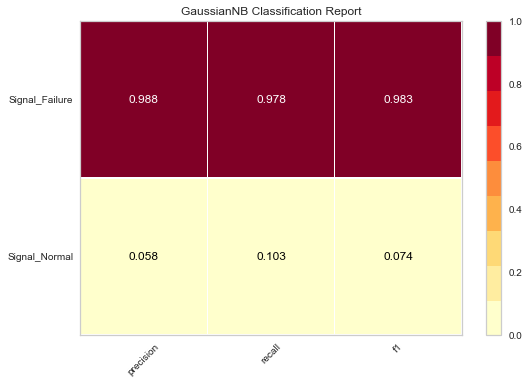

In [291]:
# pip install yellowbrick
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Signal_Normal','Signal_Failure'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [293]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, target_test, labels=['Signal_Normal','Signal_Failure'])

array([[72343,   893],
       [ 1650,   102]])

# Linear SVC

In [218]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred))

LinearSVC accuracy :  0.9867312103269856


/Users/danielkarcz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


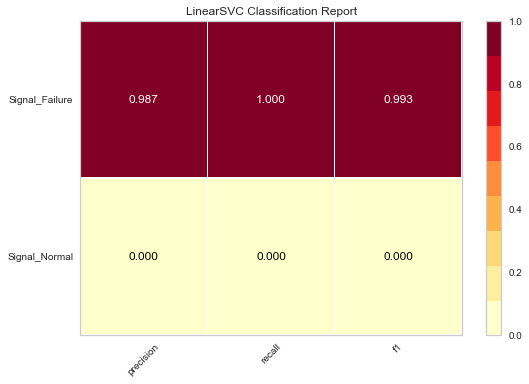

In [231]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Signal_Normal','Signal_Failure'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

# KNN Classifier

In [295]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred1 = neigh.predict(data_test)
# evaluate accuracy
print ("KNN accuracy score : ",accuracy_score(target_test, pred1))

KNN accuracy score :  0.9978396543446951


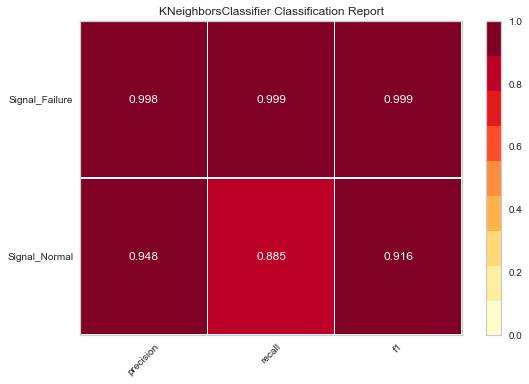

In [234]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Signal_Normal','Signal_Failure'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

# Random Forest: Regression

In [296]:
# X_train, X_test, y_train, y_test
# data_train, data_test, target_train, target_test

# convert Signal_Normal and Signal_Faiure to 1 and 0
target_train_RF = le.fit_transform(target_train)
target_test_RF = le.fit_transform(target_test)

In [297]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(data_train, target_train_RF)
y_pred = regressor.predict(data_test)

In [298]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(target_test_RF, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(target_test_RF, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test_RF, y_pred)))

Mean Absolute Error: 0.017246430171680417
Mean Squared Error: 0.008772191594790636
Root Mean Squared Error: 0.09365997861835457


# Random Forest: Classification

In [304]:
# X_train, X_test, y_train, y_test
# data_train, data_test, target_train, target_test

# convert Signal_Normal and Signal_Faiure to 1 and 0
target_train_RF = le.fit_transform(target_train)
target_test_RF = le.fit_transform(target_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(data_train, target_train_RF)
y_pred = classifier.predict(data_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(target_test_RF,y_pred))
print(classification_report(target_test_RF,y_pred))
print(accuracy_score(target_test_RF, y_pred))

[[  357   638]
 [  135 73858]]
              precision    recall  f1-score   support

           0       0.73      0.36      0.48       995
           1       0.99      1.00      0.99     73993

   micro avg       0.99      0.99      0.99     74988
   macro avg       0.86      0.68      0.74     74988
weighted avg       0.99      0.99      0.99     74988

0.9896916840027737


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [386]:
data[1]

array([ 0.00000000e+00,  6.46225654e-13,  0.00000000e+00,  0.00000000e+00,
        6.46225654e-13,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.99985090e-01, -1.86112988e-05,  1.02601247e-10,  3.63243440e-11,
        0.00000000e+00,  0.00000000e+00,  6.46225654e-13,  7.17956701e-12,
        7.51560435e-12,  5.45758159e-03, -3.08893733e-10,  1.30537582e-10,
        0.00000000e+00,  5.06946900e-12,  6.46225654e-13,  1.30537582e-10,
        1.32320871e-04,  1.30537582e-10,  8.82664289e-10,  1.32307045e-04,
        1.03396105e-11])

# Deep Learning Algorithms

In [329]:
import TensorFlow

ModuleNotFoundError: No module named 'TensorFlow'

In [330]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [335]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import sgd

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(37,)))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                380       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 490
Trainable params: 490
Non-trainable params: 0
_________________________________________________________________


In [387]:
# X_train, X_test, y_train, y_test
# data_train, data_test, target_train, target_test

batch_size = 50
num_classes = 10
epochs=10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#model.fit(data_train, target_train,
#          batch_size=batch_size,
#          epochs=epochs,
#          verbose=1
#          )

#test_loss, test_acc = model.evaluate(data_test, target_test)

#print('Test loss:', test_loss)
#print('Test accuracy:', test_acc)

# Supervised ML Classification Labels: Maximum Convolutional Decoder (MCD)

DSN 208
Telemetry Data Decoding
Purpose
810-005 208, Rev. B
This module describes the capabilities and performance of the telemetry decoding and frame synchronization equipment used by the Deep Space Network (DSN) in order to assist the telecommunications engineer in designing compatible spacecraft equipment.

The DSN supports two convolutional codes, the Consultative Committee for Space Data Systems (CCSDS) 
standard Reed-Solomon code, and the CCSDS Turbo codes. Convolutional codes are used because they achieve 
significant coding gain with simple, highly reliable encoders and their decoders are of reasonable complexity. They also provide low latency and are useful when conditions may prevent a block of symbols from being received. The Reed- Solomon code provides excellent performance with minimum bandwidth expansion in a high signal-to-noise environment. It is most often used as an outer code in combination with a convolutional inner code but may be used by itself under appropriate signal conditions. Turbo codes provide near-Shannon-limit error-correction performance with reasonable encoding and decoding complexity. The DSN presently includes an additional convolutional decoder that is used for the Cassini spacecraft support but it will be removed from service at the end of that mission.


2.5.4.1 Reed-Solomon Encoder
The most common architecture for an RS encoder is named the Berlekamp Architecture, after its inventor. 
This architecture, in combination with appropriate selection of the RS code generator polynomial, enables 
parity symbols to be calculated using bit-serial multipliers constructed with a matrix of exclusive OR gates. 
Figure 7 shows the design of a Berlekamp encoder for producing the DSN/CCSDS standard RS code that includes support
for interleaving and virtual fill as discussed below.
2.5.4.2 Concatenated Convolutional and Reed–Solomon Code Errors in convolutionally coded channels tend to occur
in bursts that result when noise causes the decoder to momentarily follow the wrong path through the decoding 
trellis. The combination of an outer Reed–Solomon (RS) code with an inner convolutional code provides good 
burst-error correction with minimal bandwidth expansion.
2.5.4.3 Interleaving
The burst errors associated with Viterbi decoding can be as long as several constraint lengths and equivalent to 
several consecutive RS symbols. Thus, several closely spaced error bursts can exceed an RS decoder's error 
correction capability.

Turbo Codes
Turbo codes provide error correction performance within approximately 0.8 dB of the theoretical limit at a BER of 
10–6. This performance is achieved using encoders and decoders of reasonable complexity but at the expense of 
increased latency. A turbo code is a systematic block code where two sets of parity symbols from independent 
recursive convolutional encoders are provided. The encoders employ trellis termination so that the codeblock both 
begins and ends in a known state.
The use of recursive convolutional encoders is one feature of turbo codes. The second is the presence of an 
interleaver at the input of one of the convolutional encoders that changes the order of the information bits 
before they are encoded. It is the presence of the interleaver that establishes the minimum latency as equaling 
the block size as an entire block of data must be assembled before the parity generation process can begin. 
Although the information bits appear, unchanged, in the encoded output, they do not appear contiguously as is the
case with Reed Solomon codes.

Data Formatting
The result of the previously described processing is a series of fixed-length frames of telemetry data. The content of
these frames may represent a single stream of telemetry data or a portion of several streams of telemetry data 
referred to as virtual channels, Virtual channels allocate the physical channel on a frame by frame basis identified
by a virtual channel identifier. The DSN separates the frames based on the virtual channel identifier and creates 
independent streams of telemetry data. The use of virtual channels enables portions of the data stream to be delivered
to different locations or with different latencies. Two types of telemetry frames are supported. Version I Frames, 
originally specified in CCSDS Recommendation 102.0-B, have the capability to support up to eight virtual channels
numbered from 0 to 7. Version II Frames, originally specified in CCSDS Recommendation 701.0-B, have the capability 
to support up to sixty-four virtual channels. The DSN can combine from 1 to 16 of these channels into virtual data 
streams and the same virtual channel may appear in multiple virtual data streams. The number of virtual data streams
that can be created for any one project is limited to 16.

3.4.3 Telemetry Processing
Two BVRs are assigned to a project’s tracking pass. Each BVR has phase- locked loops for acquiring and tracking the 
carrier, telemetry subcarrier, and telemetry symbol stream. Voyager generates a 22.5-kHz subcarrier for use with bit
rates less than or equal to 7.2 kbps and a 360-kHz subcarrier for use with bit rates greater than 7.2 kbps. In the
residual carrier mode, the X-band carrier.

Voyager Telecommunication 61
modulation index settings vary from 51 deg for the lowest data rate (10 bps) to 80 deg for the highest (115.2 kbps).17
The BVR delivers telemetry symbols to the maximum likelihood convolutional decoder (MCD). Voyager can use either the 
Block 2 or Block 3 MCD (MCD2 or MCD3)18 to process the (7,1/2) convolutional code. The MCD outputs decoded telemetry 
bits to the frame synchronizer subsystem (FSS).
An MCD/FSS pair makes up a telemetry channel assembly (TCA). The telemetry group controller governs the operation of 
TCA1 (with MCD3) and TCA2 (with MCD2). After the MCD achieves lock, the FSS requires recognition of a minimum of two 
successive frame-sync words to output telemetry to the project. Validation requires recognition of a third sync word.
The number of allowable miscompares (between received and expected bit values) in each frame-sync word recognized by 
the synchronizer can be set in the software.
3.5 Sample Telecom System Performance
The Voyager spacecraft receives an S-band uplink from the Earth and transmits S-and X-band downlinks to the Earth,
compatible with DSN station configurations and performance defined in the DSN Network Operations Plan for VIM [9] 
and the DSN Telecommunications Link Design Handbook [7].

# Anomaly Detection Methods 

In [54]:
# 1) Density based (spatial proximity): DBSCAN, and LOF.
# 2) Distance based (spatial proximity): KNN, K-MEANS, Regression Hyperplane distance
# 3) Parametric: GMM, Single Class SVM's, Extreme Value Theory
# 4) Other Statistical Tests: Z-Score, and varations of the above.


In [55]:
#4 

# Takes the median of the median to better portray the spread for detecting an anomaly
def medianAbsoluteDeviation(data):
    median_ = np.median(data, axis=0)
    MAD_ = np.median(np.abs(data-median_))
    return MAD_

# Density based anomaly detection


In [57]:
# Isolation Forest (ensamble method) and it used the concept of isloation, to exlplain (isolate away), anomalies.
# No profiling of normal instances, and no point based distance calculation.  Instead, IF builds an ensamble of
# random trees for a given data set, and anomalies are poins with the shortest average path length.  View image here
# https://pubs.rsc.org/en/content/articlelanding/2016/ay/c6ay01574c#!divAbstract




In [58]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

import itertools
import matplotlib.pyplot as plt
import datetime

In [50]:
import seaborn as sns

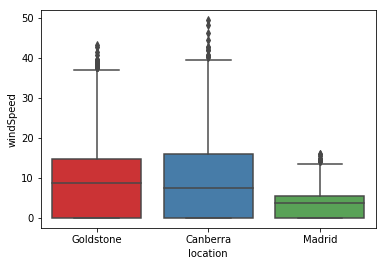

In [112]:
# Grouped boxplot
sns.boxplot(x='location', y="windSpeed", data=df, palette="Set1")

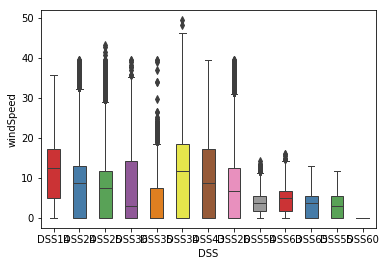

In [160]:
# Grouped boxplot
sns.boxplot(x='DSS', y="windSpeed", data=df, palette="Set1", width = .5, linewidth=1)


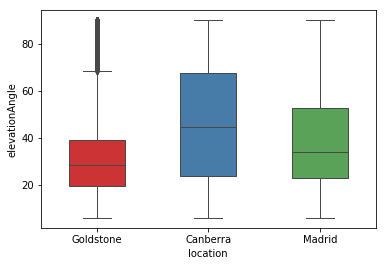

In [148]:
# Grouped boxplot
sns.boxplot(x='location', y="elevationAngle", data=df, palette="Set1", width = .5, linewidth=1)

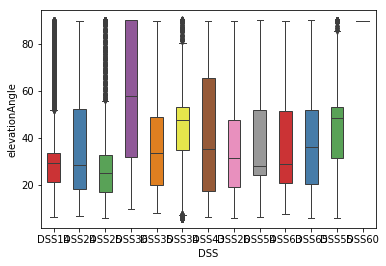

In [151]:
# Grouped boxplot
sns.boxplot(x='DSS', y="elevationAngle", data=df, palette="Set1", width = .5, linewidth=1)

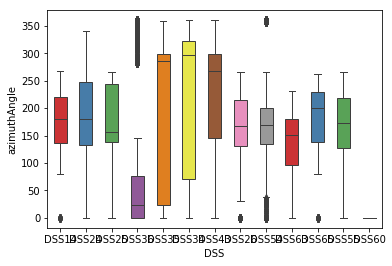

In [152]:
# Grouped boxplot
sns.boxplot(x='DSS', y="azimuthAngle", data=df, palette="Set1", width = .5, linewidth=1)

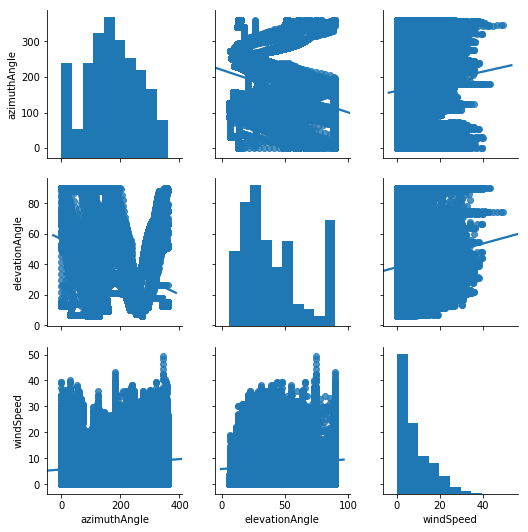

In [119]:
# with regression
import matplotlib.pyplot as plt

sns.pairplot(df[['azimuthAngle', 'elevationAngle','windSpeed']], kind="reg")
plt.show()


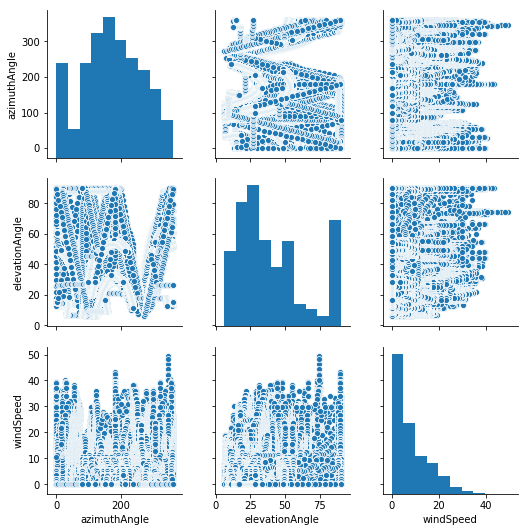

In [122]:
# without regression
sns.pairplot(df[['azimuthAngle', 'elevationAngle','windSpeed']], kind="scatter")
plt.show()

/Users/danielkarcz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/danielkarcz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


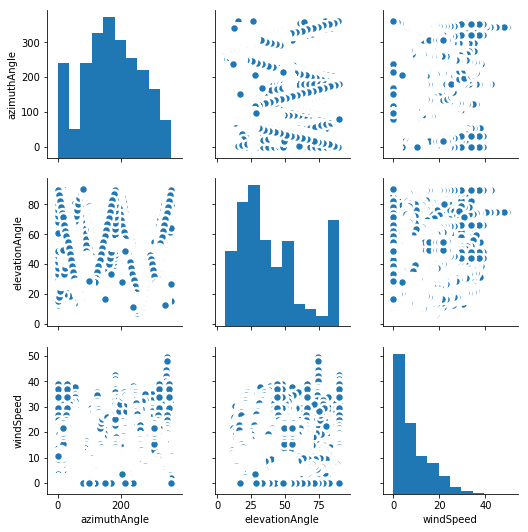

In [127]:
sns.pairplot(df[['azimuthAngle', 'elevationAngle','windSpeed']], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()


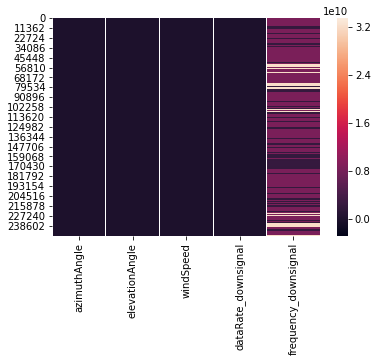

In [144]:
sns.heatmap(df[['azimuthAngle', 'elevationAngle','windSpeed','dataRate_downsignal', 'frequency_downsignal']])

# IsolationForest

In [388]:
from sklearn.ensemble import IsolationForest

# I need to add "downsignal_class" as the label.
clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(final_df[['DSS14','azimuthAngle','elevationAngle', 'isArray', 'isDDOR', 'isMSPA', 'windSpeed', 'dataRate_downsignal', 
                                  'frequency_downsignal', 'power_downsignal']])


In [389]:
preds

array([ 1, -1,  1, ...,  1,  1,  1])

In [183]:
#This code will output the predictions for each data point in an array. If the result is -1, 
#it means that this specific data point is an outlier. If the result is 1, then it means that 
#the data point is not an outlier
np.unique(preds, return_counts = True)

(array([-1,  1]), array([ 62130, 187829]))